In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
def drop_columns(dataset,col):
    dataset=dataset.drop(col,axis=1)
    return dataset

In [7]:
train_data=drop_columns(train_data,["PassengerId",'Name','SibSp','Parch','Ticket','Cabin',"Fare"])

In [8]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [9]:
test_data=drop_columns(test_data,["PassengerId",'Name','SibSp','Parch','Ticket','Cabin',"Fare"])

In [10]:
test_data.head()

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S


In [11]:
train_data["Sex"]=train_data["Sex"].map({"male":0,"female":1})

In [12]:
test_data["Sex"]=test_data["Sex"].map({"male":0,"female":1})

In [13]:
train_data["Embarked"]=train_data["Embarked"].map({"Q":0,"S":1,"C":2})

In [14]:
test_data["Embarked"]=test_data["Embarked"].map({"Q":0,"S":1,"C":2})

In [15]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,1.0
1,1,1,1,38.0,2.0
2,1,3,1,26.0,1.0
3,1,1,1,35.0,1.0
4,0,3,0,35.0,1.0


In [16]:
test_data.head()

,Pclass,Sex,Age,Embarked
0,3,0,34.5,0
1,3,1,47.0,1
2,2,0,62.0,0
3,3,0,27.0,1
4,3,1,22.0,1


In [17]:
train_data.isnull().sum()/train_data.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
Embarked    0.002245
dtype: float64

In [18]:
test_data.isnull().sum()/test_data.shape[0]

Pclass      0.000000
Sex         0.000000
Age         0.205742
Embarked    0.000000
dtype: float64

In [19]:
mean_age_train=train_data["Age"].mean()
mean_age_test=test_data["Age"].mean()

In [20]:
train_data["Age"].fillna(value=mean_age_train,inplace=True)
test_data["Age"].fillna(value=mean_age_test,inplace=True)

In [21]:
median_embarked=train_data["Embarked"].median()

In [22]:
train_data["Embarked"].fillna(value=median_embarked,inplace=True)

In [23]:
train_data.describe()

,Survived,Pclass,Sex,Age,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,1.102132
std,0.486592,0.836071,0.477990,13.002015,0.514624
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,1.000000
50%,0.000000,3.000000,0.000000,29.699118,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,2.000000


In [24]:
test_data.describe()

,Pclass,Sex,Age,Embarked
count,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.272590,1.133971
std,0.841838,0.481622,12.634534,0.580452
min,1.000000,0.000000,0.170000,0.000000
25%,1.000000,0.000000,23.000000,1.000000
50%,3.000000,0.000000,30.272590,1.000000
75%,3.000000,1.000000,35.750000,1.000000
max,3.000000,1.000000,76.000000,2.000000


In [25]:
y=train_data["Survived"].copy()

In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
x=train_data.copy()

In [28]:
x=drop_columns(x,["Survived"])

In [29]:
x

,Pclass,Sex,Age,Embarked
0,3,0,22.000000,1.0
1,1,1,38.000000,2.0
2,3,1,26.000000,1.0
3,1,1,35.000000,1.0
4,3,0,35.000000,1.0
...,...,...,...,...
886,2,0,27.000000,1.0
887,1,1,19.000000,1.0
888,3,1,29.699118,1.0
889,1,0,26.000000,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023681516F28>,
      dtype=object)

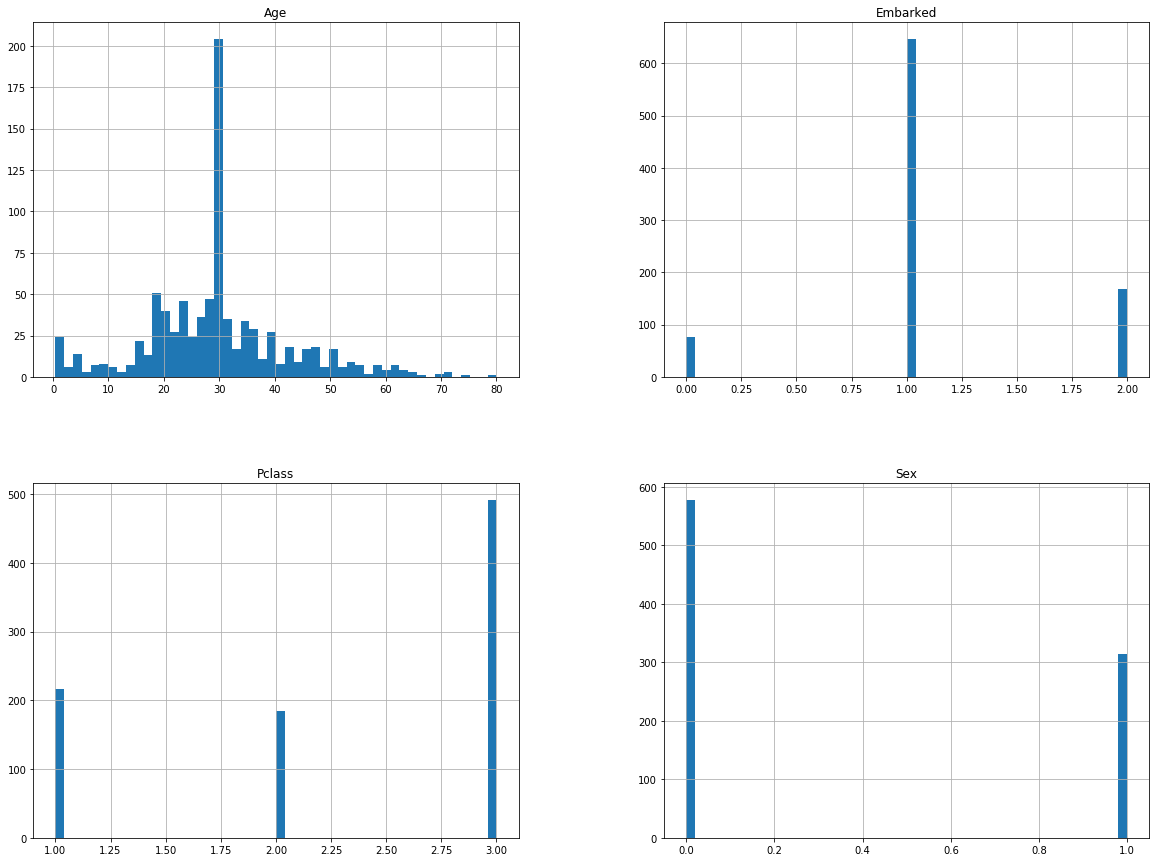

In [30]:
x.hist(bins=50,figsize=(20,15))

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,criterion="entropy")

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_test_pred_rfc=rfc.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred_rfc)

0.7888888888888889

In [36]:
from sklearn.model_selection import cross_val_score
accuracy_rfc=cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=10)

In [38]:
accuracy_rfc.mean()

0.7902006172839506

In [39]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [40]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
from sklearn.model_selection import cross_val_score
accuracy_xgb=cross_val_score(estimator=xgb,X=x_train,y=y_train,cv=10)

In [42]:
accuracy_xgb.mean()

0.8139506172839507

In [45]:
predictions=xgb.predict(test_data)

In [46]:
pd.DataFrame({"PassengerId":list(range(892,1310)),
              "Survived":predictions}).to_csv("gender_submission.csv",
                                           index=False,
                                           header=True)